In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

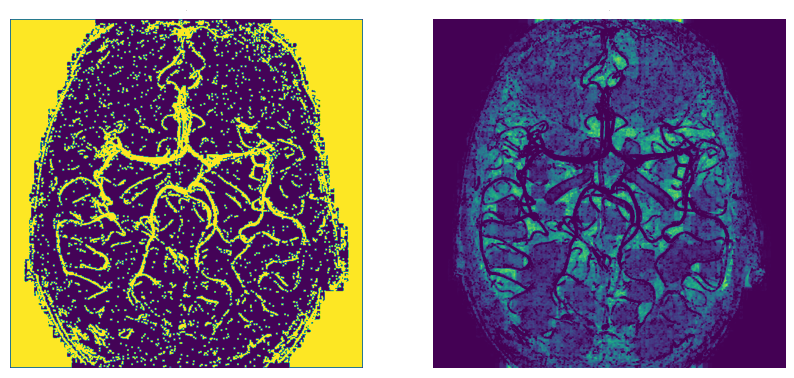

True

In [4]:
img = cv.imread('tomo1.jpg')

        #mascaras
kernel_magn  = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel_noise = np.ones((3, 3), np.uint8)

        #mejoramiento de imagen
img_magn = cv.filter2D(src = img, ddepth = -1, kernel = kernel_magn)

        #conversion a escala de grrises
img_gray = cv.cvtColor(img_magn, cv.COLOR_BGR2GRAY)

        #Eliminacion de ruido
img_noise  = cv.morphologyEx(img_gray, cv.MORPH_BLACKHAT, kernel_noise, iterations = 10)

_, thresh = cv.threshold(img_gray, 255, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

        #Diferenciacion de fondo
bg_dif  = cv.erode(img_noise, kernel_noise, iterations = 1)

        #Diferenciacion de área
dis  = cv.distanceTransform(img_noise,cv.DIST_C, 5)
_, area_dif  = cv.threshold(dis, 50 * dis.max(), 0, 0)
area_blur = cv.medianBlur(area_dif, 5)

        #Diferenciacion de bordes
area_dif  = np.uint8(area_blur)

img_adap = cv.adaptiveThreshold(area_dif, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 21, 55)

unknown  = cv.subtract(bg_dif, area_dif)

_, markers  = cv.connectedComponents(area_dif)

markers  = markers + 1

markers [unknown == 0] = 255

markers  = cv.watershed(img,markers)
img[markers  == - 1] = [255,0,0]


plt.figure(figsize = (10, 30), dpi = 100)
plt.subplot (421), plt.imshow(markers), plt.axis('off'), plt.title('r', size =0)
plt.subplot (422), plt.imshow(unknown),  plt.axis('off'), plt.title('r', size =0)
plt.show()
cv.imwrite('image.jpg', markers)

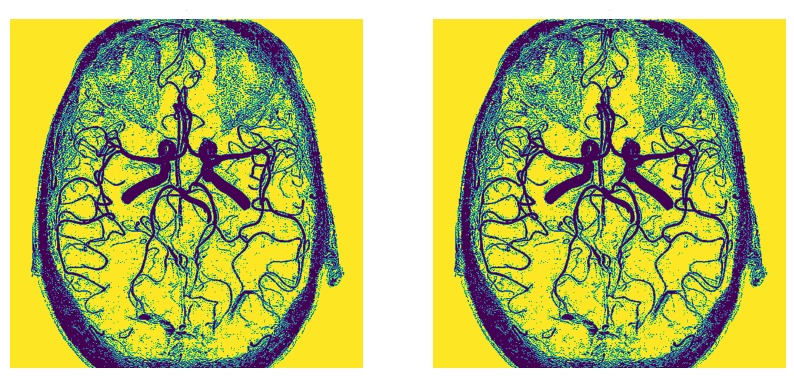

True

In [5]:
        #umbralizacion por binarizacion OTSU
_, thresh = cv.threshold(img_gray, 255, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

kernel_magn  = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

img_magn = cv.filter2D(src = thresh, ddepth = -1, kernel = kernel_magn)


plt.figure(figsize = (10, 30), dpi = 100)
plt.subplot (221), plt.imshow(thresh), plt.axis('off'), plt.title('r', size =0)
plt.subplot (222), plt.imshow(img_magn), plt.axis('off'), plt.title('r', size =0)
plt.show()
cv.imwrite('image1.jpg', img_magn)

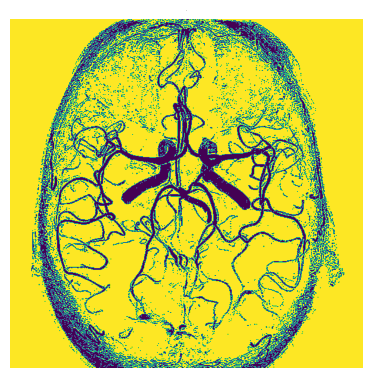

True

In [6]:
        #umbralización por #Block size
_, thresh1 = cv.threshold(img_gray, 140, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize = (10, 30), dpi = 100)
plt.subplot(221), plt.imshow(thresh1), plt.axis('off'), plt.title('r', size =0)
plt.show()
cv.imwrite('image2.jpg', thresh1)

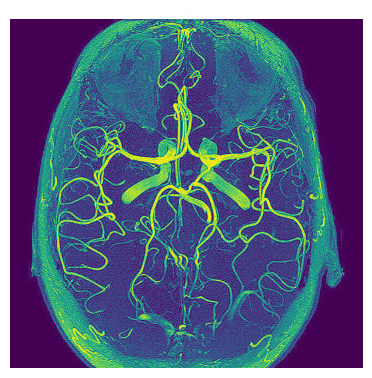

True

In [7]:
        #umbralización por TRUNC
_, thresh2 = cv.threshold(img_gray, 255, 255, cv.THRESH_TRUNC)

plt.figure(figsize = (10, 30), dpi = 100)
plt.subplot(221), plt.imshow(thresh2), plt.axis('off'), plt.title('r', size =0)
plt.show()
cv.imwrite('image3.jpg', thresh2)

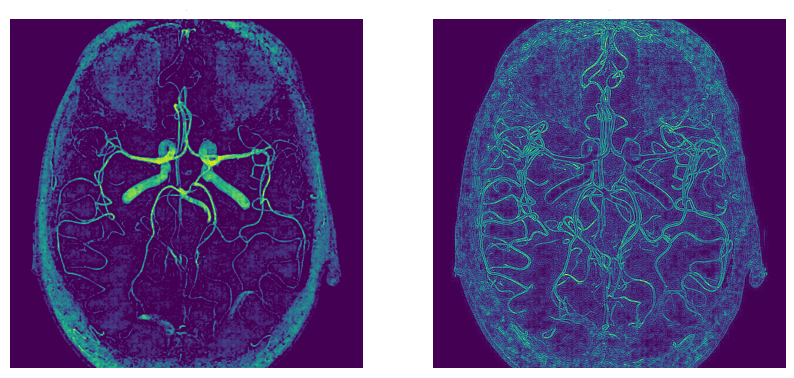

True

In [10]:
    #Umbralizado por erosión

    #Creacion de mascara 3 x 3
thresh3 = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
erode = cv.erode(img_gray, thresh3)

edge = img_gray - erode

plt.figure(figsize = (10, 30), dpi = 100)
plt.subplot(221), plt.imshow(erode), plt.axis('off'), plt.title('r', size =0)
plt.subplot(222), plt.imshow(edge), plt.axis('off'), plt.title('r', size =0)
plt.show()
cv.imwrite('image4.jpg', edge)

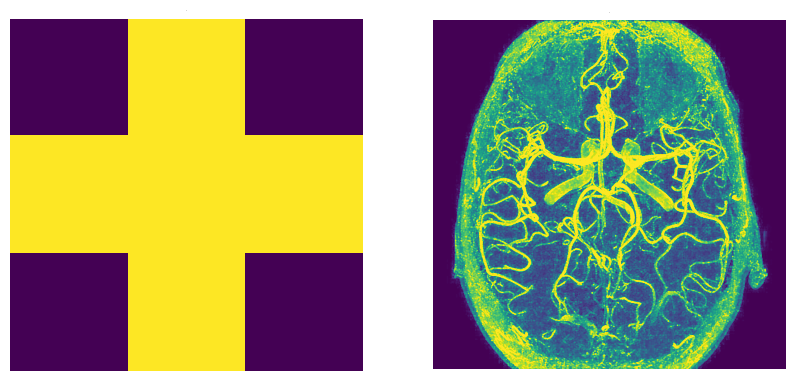

True

In [47]:
    #Umbralizacion por dilatacion
ratio = 1

    #Crear elemento de estructura
thresh4 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2*ratio+1, 2*ratio+1))
    # imagen dilatada
dilate = cv.dilate(img_gray, thresh4)

plt.figure(figsize = (10, 30), dpi = 100)
plt.subplot(221), plt.imshow(thresh4), plt.axis('off'), plt.title('r', size =0)
plt.subplot(222), plt.imshow(dilate), plt.axis('off'), plt.title('r', size =0)
plt.show()
cv.imwrite('image5.jpg', dilate)

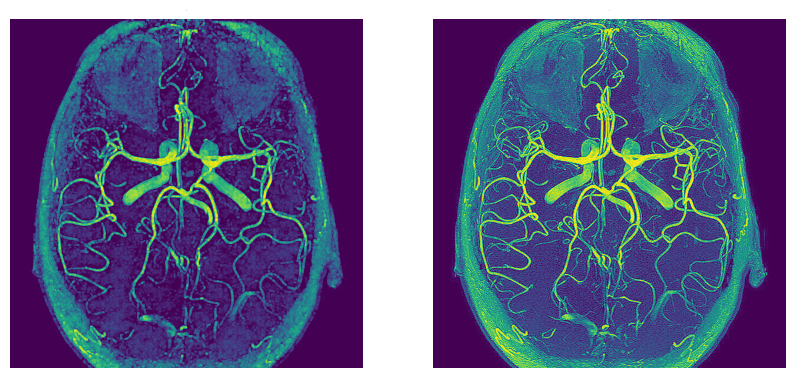

True

In [43]:
    #Umbralizacion por apertura y cierre

thresh5 = cv.getStructuringElement(cv.MORPH_RECT, (2, 2))
    # Procesamiento morfológico
d_open = cv.morphologyEx(img_gray,cv.MORPH_OPEN, thresh5, iterations=2)

plt.figure(figsize = (10, 30), dpi = 100)
plt.subplot(221), plt.imshow(d_open), plt.axis('off'), plt.title('r', size =0)
plt.subplot(222), plt.imshow(img_gray), plt.axis('off'), plt.title('r', size =0)
plt.show()
cv.imwrite('image6.jpg', d_open)